In [ ]:
# Importing required libraries -
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

!pip install graphviz


In [ ]:
#read in data
train = pd.read_csv("data/Training.csv")
test = pd.read_csv("data/Testing.csv")


In [ ]:
combined = [train,test]
data = pd.concat(combined)
data.dtypes
data.isnull().sum().any()




In [ ]:
data.shape

In [ ]:
data.head(20)

In [ ]:
data.drop('Unnamed: 133', axis=1, inplace=True)

In [ ]:
data.columns

In [ ]:
data.isnull().sum().any()

In [ ]:
data.shape

In [ ]:


train, test = train_test_split(data, test_size=0.25)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.head()

### Splitting Dependent and Independent variables 

In [ ]:
X_train = train.drop('prognosis', axis=1)
y_train = train['prognosis']

X_test = test.drop('prognosis', axis=1)
y_test = test['prognosis']

In [ ]:
X_train.head()

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)



In [ ]:
train_accuracy = tree.score(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)

print("Train accuracy :{}".format(train_accuracy))
print("Test accuracy :{}".format(test_accuracy))

In [ ]:
symptoms = data.columns
symptoms = symptoms.drop("prognosis")
symptoms = symptoms.tolist()
symptoms

In [ ]:
from sklearn.tree import export_text
r = export_text(tree, feature_names=symptoms)
print(r)

In [ ]:
tree.score(X_train, y_train)

In [ ]:
tree.score(X_test, y_test)

In [ ]:
### try changing max_depth of tree classifier
tree = DecisionTreeClassifier(max_depth=133, random_state = 1)
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

In [ ]:
outcomes = data['prognosis'].unique().tolist()

In [ ]:
### Try pronting decision tree graph

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz (tree, out_file = "tree.dot", class_names = outcomes, feature_names = symptoms, impurity = False,\
                 filled = True)

In [ ]:
import graphviz

In [ ]:
with open ("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# Convert a .dot file to .png
from graphviz import render
render('dot', 'png', 'tree.dot')

# To render an existing file in a notebook
#from graphviz import Source
#Source.from_file("fname.dot")

In [ ]:
tree.feature_importances_


In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
def plot_feature_importances_diseases(model):
    n_features = len(symptoms)
    plt.figure(figsize=(20,10))
    plt.bar(np.arange(n_features), model.feature_importances_, align='center')
    plt.xticks(np.arange(n_features), symptoms, rotation = "vertical")
    plt.ylabel("Feature importance")
    plt.xlim(-1, n_features)
    plt.savefig("DT_importances.png")

In [ ]:
plot_feature_importances_diseases(tree)

In [ ]:
### Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Classifier
forest=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
forest.fit(X_train, y_train)

In [ ]:
train_accuracy = forest.score(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)

print("Train accuracy :{}".format(train_accuracy))
print("Test accuracy :{}".format(test_accuracy))

In [ ]:
def plot_feature_importances_diseases(model):
    n_features = len(symptoms)
    plt.figure(figsize=(20,10))
    plt.bar(np.arange(n_features), model.feature_importances_, align='center')
    plt.xticks(np.arange(n_features), symptoms, rotation = "vertical")
    plt.ylabel("Feature importance")
    plt.xlim(-1, n_features)
    plt.savefig("forest_importances.png")

In [ ]:
plot_feature_importances_diseases(forest)

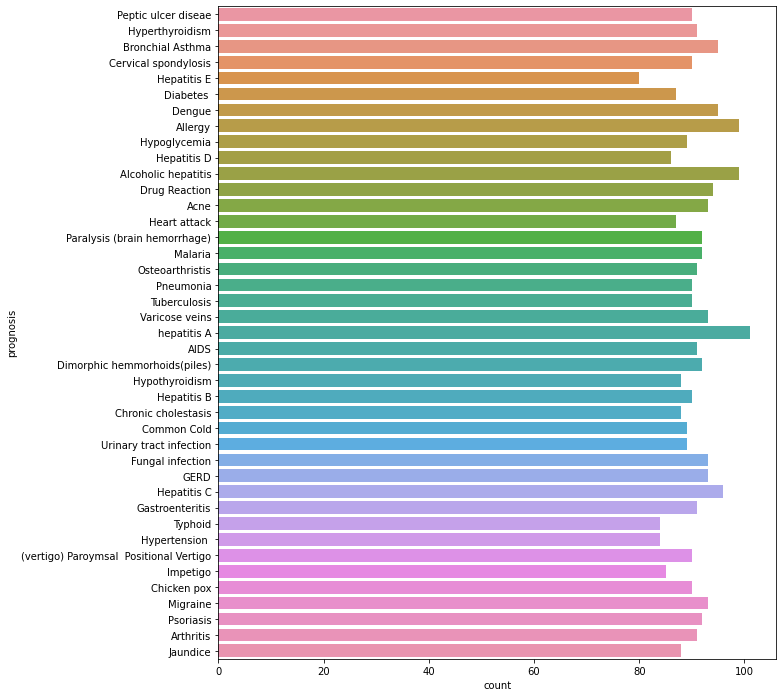

In [36]:
plt.figure(figsize = (10, 12))
countplot = sns.countplot(y='prognosis', data=train)
plt.savefig("disease_counts.png")
plt.show()

